# Exploring some data from the Dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.modules.lfw_lightning_data_module import LfwImagesPairsDataset, LFW_DataModule
from src.tools.dataset_tools import get_dataset_filename_map, dataset_download_targz, get_pairs

dataset_download_targz()
image_map = get_dataset_filename_map(min_val=1)
pairs_map = get_pairs()
train_dataset = LfwImagesPairsDataset(image_map,pairs_map["train"])
val_dataset = LfwImagesPairsDataset(image_map,pairs_map["valid"])
test_dataset = LfwImagesPairsDataset(image_map,pairs_map["test"])
print("Number of train pictures", len(train_dataset))
print("Number of valid pictures", len(val_dataset))
print("Number of test pictures", len(test_dataset))

Dataset already downloaded
Number of train pictures 2200
Number of valid pictures 500
Number of test pictures 500


In [3]:
#some of element in image map

c = 0
for key in image_map:
    print(key)
    print(image_map[key],"\n")
    c += 1
    if c==5:
        break
c=0    
for line in pairs_map["valid"]:
    print(line)
    c += 1
    if c==5:
        break

German_Khan
['./data/dataset/lfw/German_Khan/German_Khan_0001.jpg'] 

Stefano_Gabbana
['./data/dataset/lfw/Stefano_Gabbana/Stefano_Gabbana_0001.jpg'] 

Dragan_Covic
['./data/dataset/lfw/Dragan_Covic/Dragan_Covic_0001.jpg'] 

Jeff_Hornacek
['./data/dataset/lfw/Jeff_Hornacek/Jeff_Hornacek_0001.jpg'] 

Sureyya_Ayhan
['./data/dataset/lfw/Sureyya_Ayhan/Sureyya_Ayhan_0001.jpg'] 

['Donald_Rumsfeld', '28', '108\n']
['John_Garamendi', '2', 'Peter_Goldmark', '1\n']
['Charmaine_Crooks', '1', 'Esad_Landzo', '1\n']
['James_Kelly', '9', '11\n']
['Ali_Naimi', '3', '4\n']


 Train dataset ----------------------------

 
 



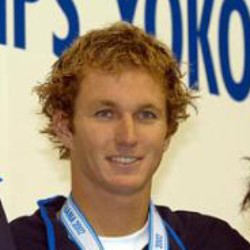

image1


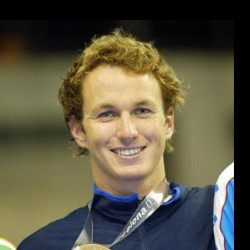

image2
They are the same person?  True

 
 



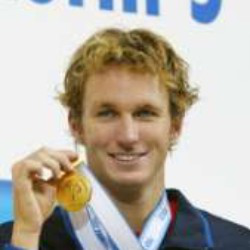

image1


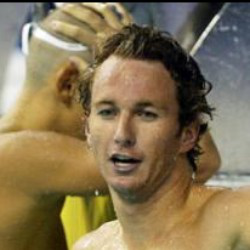

image2
They are the same person?  True

 
 



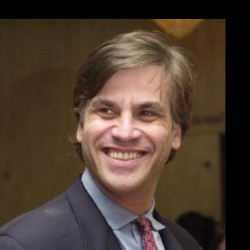

image1


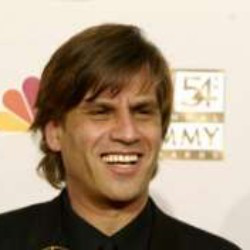

image2
They are the same person?  True

 Validation dataset ----------------------------

 
 



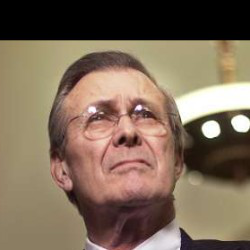

image1


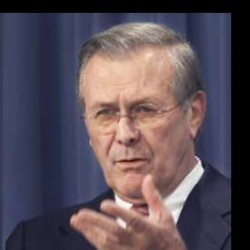

image2
They are the same person?  True

 
 



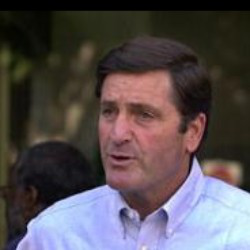

image1


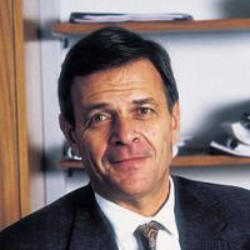

image2
They are the same person?  False

 
 



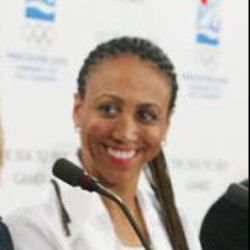

image1


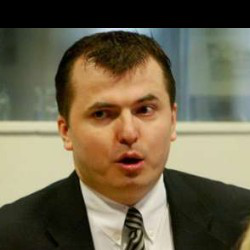

image2
They are the same person?  False

 Test dataset ----------------------------

 
 



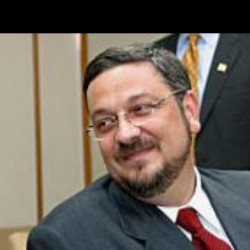

image1


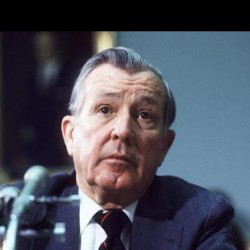

image2
They are the same person?  False

 
 



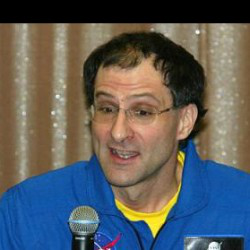

image1


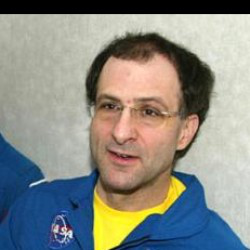

image2
They are the same person?  True

 
 



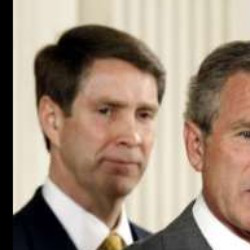

image1


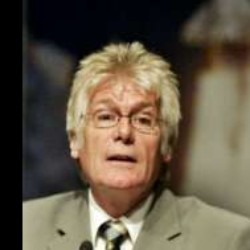

image2
They are the same person?  False


In [4]:
#some images

from PIL import Image
import numpy as np

c=0
#image from train dataset
print(" Train dataset ----------------------------")
for image1,image2,label in train_dataset:
    print("\n \n \n")
    display(image1)
    print("image1")
    display(image2)
    print("image2")
    print("They are the same person? ",label)
    c+=1
    if c==3:
        break

#image from validation dataset
c=0
print("\n Validation dataset ----------------------------")
for image1,image2,label in val_dataset:
    print("\n \n \n")
    display(image1)
    print("image1")
    display(image2)
    print("image2")
    print("They are the same person? ",label)
    c+=1
    if c==3:
        break
        
#image from test dataset
c=0
print("\n Test dataset ----------------------------")
for image1,image2,label in test_dataset:
    print("\n \n \n")
    display(image1)
    print("image1")
    display(image2)
    print("image2")
    print("They are the same person? ",label)
    c+=1
    if c==3:
        break

In [5]:
#some statistics
print("Number of subjects: ",len(image_map))
pic=0
for val in image_map.values():
    pic += len(val)
print("Total number of pictures: ",pic)
print("Avg pic for each subject: ", pic/len(image_map))

Number of subjects:  5749
Total number of pictures:  13233
Avg pic for each subject:  2.301791615933206


In [6]:
#DataLoader info
import multiprocessing as mp

dataloader = LFW_DataModule(
    train_dataset, 
    batch_size=32, 
    splitting_points=None, 
    num_workers=mp.cpu_count(), 
    manual_split=True, 
    valid_dataset=val_dataset, 
    test_dataset=test_dataset
)
dataloader.setup()
train_loader = dataloader.train_dataloader()
val_loader = dataloader.val_dataloader()
test_loader = dataloader.test_dataloader()

print("Batch_size: ", train_loader.batch_size)
print("Sampler info: ", train_loader.sampler)
print("Train loader length: ",len(train_loader))
print("Validation loader length: ",len(val_loader))
print("Test loader length: ",len(test_loader))

Batch_size:  32
Sampler info:  <torch.utils.data.sampler.RandomSampler object at 0x1327232b0>
Train loader length:  69
Validation loader length:  16
Test loader length:  16


max value 1.0
min value 0.0
tensor([ True,  True,  True, False,  True])


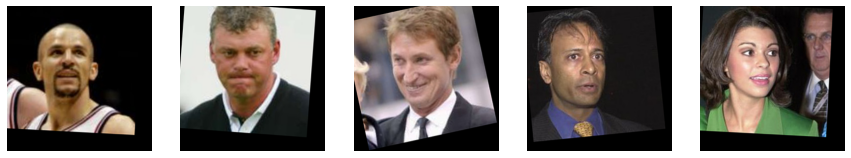

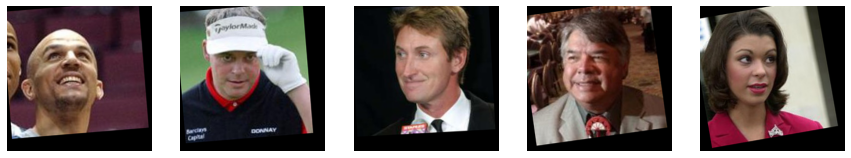

In [7]:
#Dataloader samples
from src.tools.visualization_tools import visualize_torch
import torch

for i, (im1, im2, label) in enumerate(train_loader):
    print('max value', torch.max(im1).item())
    print('min value', torch.min(im1).item())
    visualize_torch(im1[0:5])
    visualize_torch(im2[0:5])
    print(label[0:5])
    
    if i == 0:
        break

# Training the model